In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, SimpleRNN, RNN
from keras.models import Sequential
import lstm, time #helper librarie

Using TensorFlow backend.


In [2]:
import datetime as dt
import pandas as pd

df = pd.read_csv('E:/Academics/courses/5th/project/proj/^GSPC.csv')
df['Close'].to_csv('S&P.csv',index=False)

X_train, y_train, X_test, y_test = lstm.load_data('S&P.csv', 50, True)

In [19]:
from keras import metrics
from keras.optimizers import Nadam
import keras.backend as K
import numpy as np

model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    512,
    activation = 'tanh',
    recurrent_activation = 'hard_sigmoid',
    return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(
    800,
    activation = 'tanh',
    recurrent_activation = 'hard_sigmoid',
    return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(
    output_dim=1,
    ))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
print('compilation time : ', time.time() - start)

compilation time :  0.07764863967895508


In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=500,
    nb_epoch=5,
    validation_data=(X_test,y_test)
    )


Train on 15340 samples, validate on 1704 samples
Epoch 1/5
15340/15340 [==============================] - 1299s 85ms/step - loss: 8.3846e-04 - acc: 0.0011 - val_loss: 2.1121e-04 - val_acc: 0.0000e+00
Epoch 2/5
 2000/15340 [==>...........................] - ETA: 18:02 - loss: 3.3885e-04 - acc: 0.0010    

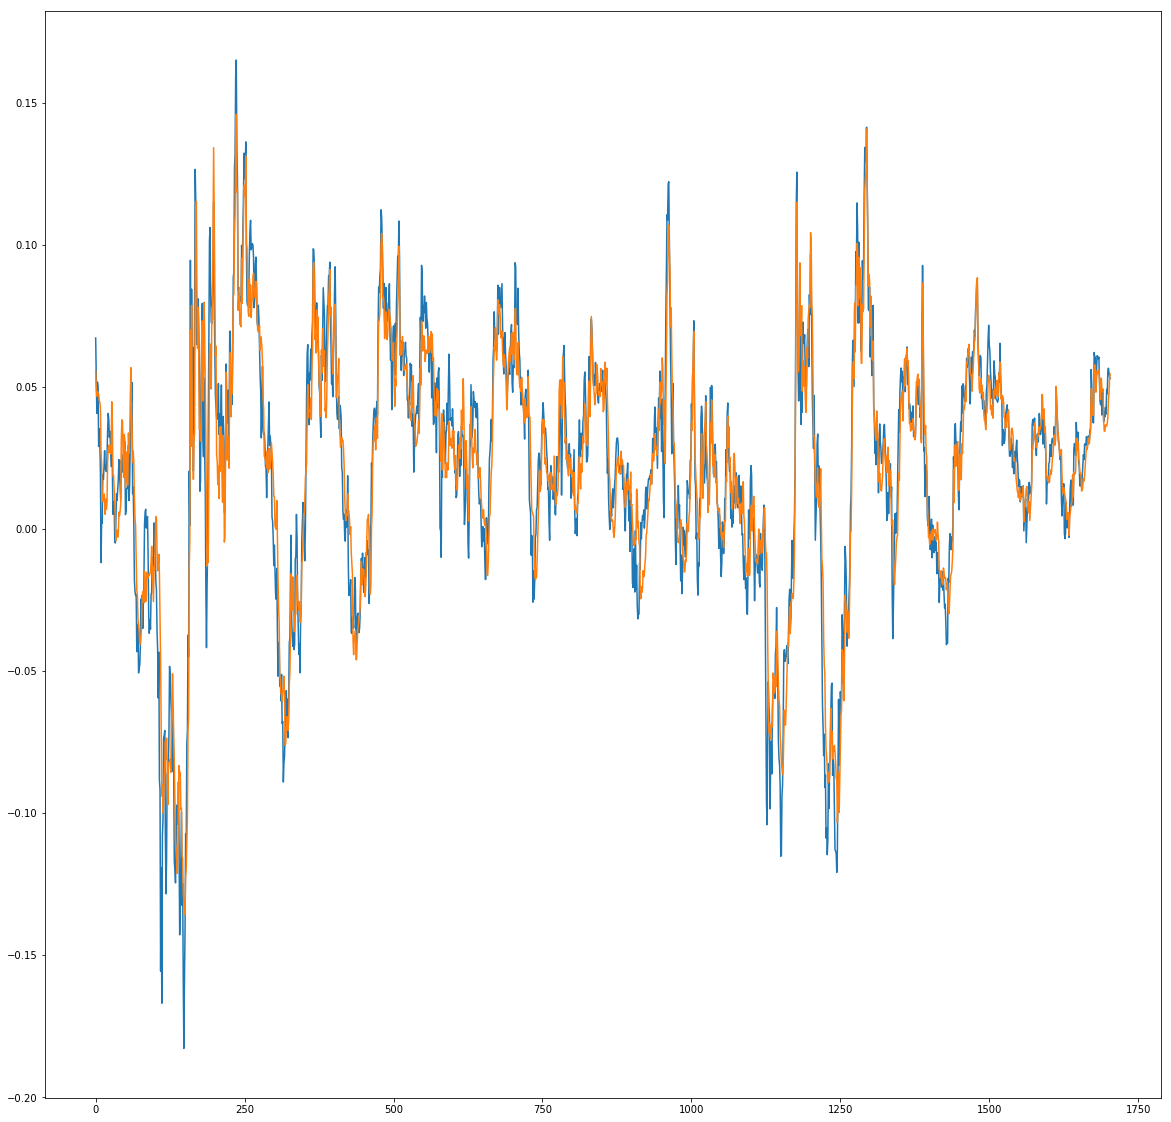

In [15]:
import matplotlib.pyplot as plt
import numpy as np

#predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
#lstm.plot_results_multiple(predictions, y_test, 50)
#print(X_test)
predicted = model.predict(X_test)
predicted = np.reshape(predicted,(predicted.size,))
plt.figure(figsize=(20,20))
plt.plot(y_test)
plt.plot(predicted)
plt.show()